Neural Nets can compute any function. Lets try to make a neural net fit a simple sign wave 



In [1]:
import numpy as np
import tensorflow as tf
from IPython import display
import sys
%matplotlib inline

In [2]:
x_train = np.asarray(np.arange(-1, 1, 0.05), dtype='f')

In [3]:
print  np.matrix(x_train).shape

(1, 40)


In [4]:
y_train = np.sin(x_train*1.5 * np.pi)

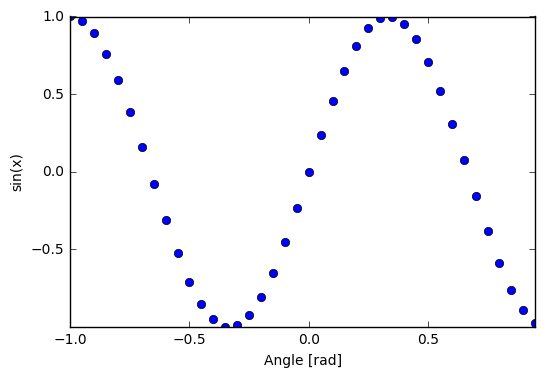

In [5]:
import matplotlib.pylab as plt
plt.plot(x_train, y_train,'o')
plt.xlabel('Angle [rad]')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [6]:
#Hyperparamters
learning_rate = 0.0005
training_epochs = 25000
batch_size = 100
display_step = 1000
n_samples = 1000

# Network Parameters
n_hidden_1 = 15 # 1st layer number of features
n_hidden_2 = 15 # 2nd layer number of features
n_input = 1 # Number of inputs 
n_output = 1 # NUmber of outputs

# tf Graph input
X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32,  [None, 1])


In [7]:
def layer(input, weight_shape, bias_shape):
    weights = tf.get_variable("weights", weight_shape,
        initializer=tf.random_normal_initializer())
    biases = tf.get_variable("biases", bias_shape,
        initializer=tf.constant_initializer(0.0))
    pre_Activation = tf.add(tf.matmul(input,weights), biases)
    return tf.nn.relu(pre_Activation)

def outputLayer(input, weight_shape, bias_shape):
    weights = tf.get_variable("weights", weight_shape,
        initializer=tf.random_normal_initializer())
    biases = tf.get_variable("biases", bias_shape,
        initializer=tf.constant_initializer(0.0)) 
    return tf.add(tf.matmul(input,weights), biases)

def feed_forward(x, scope):
    with tf.variable_scope("layer1",reuse=scope):
        relu1 = layer(x, [n_input, n_hidden_1], [n_hidden_1])
    with tf.variable_scope("layer2",reuse=scope):
        relu2 = layer(relu1, [n_hidden_1, n_hidden_2], [n_hidden_2])
    with tf.variable_scope("layer3",reuse=scope):
        return outputLayer(relu2, [n_hidden_2, n_output], [n_output])

In [8]:
# Construct model
pred = feed_forward(X, None)

# Define loss and optimizer
cost = tf.reduce_mean(tf.pow(pred-Y, 2))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [9]:
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict={X: np.matrix(x_train).transpose() , Y: np.matrix(y_train).transpose() })   
        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            x_temp = np.matrix(x_train).transpose()
            y_temp = np.matrix(y_train).transpose()
            c = sess.run(cost, feed_dict={X: np.matrix(x_train).transpose() , Y: np.matrix(y_train).transpose() })
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c)

    print "Optimization Finished!"

    x_test = np.matrix(np.asarray(np.arange(-1, 1, 0.003), dtype='f')).transpose()
    f_out = feed_forward(np.matrix(x_test), True)
    f_out = sess.run(f_out)
    f_out = np.squeeze(np.asarray(f_out))
    #print fopt

Epoch: 1000 cost= 0.055786118
Epoch: 2000 cost= 0.000634033
Epoch: 3000 cost= 0.000270692
Epoch: 4000 cost= 0.000163462
Epoch: 5000 cost= 0.000105480
Epoch: 6000 cost= 0.000078156
Epoch: 7000 cost= 0.000065194
Epoch: 8000 cost= 0.000059583
Epoch: 9000 cost= 0.000055716
Epoch: 10000 cost= 0.000052253
Epoch: 11000 cost= 0.000047984
Epoch: 12000 cost= 0.000043325
Epoch: 13000 cost= 0.000038817
Epoch: 14000 cost= 0.000036766
Epoch: 15000 cost= 0.000018059
Epoch: 16000 cost= 0.000017517
Epoch: 17000 cost= 0.000016404
Epoch: 18000 cost= 0.000016750
Epoch: 19000 cost= 0.000016283
Epoch: 20000 cost= 0.000022633
Epoch: 21000 cost= 0.000016208
Epoch: 22000 cost= 0.000016034
Epoch: 23000 cost= 0.000016179
Epoch: 24000 cost= 0.000015843
Epoch: 25000 cost= 0.000015802
Optimization Finished!


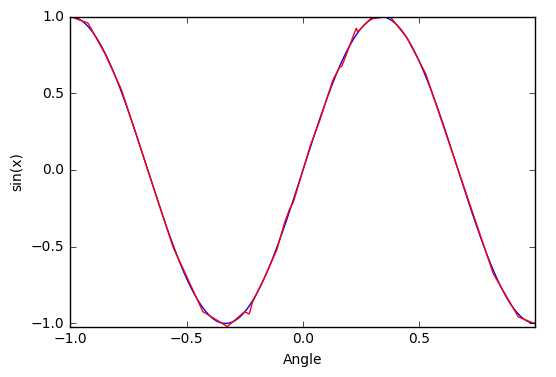

In [10]:
y_real = np.sin(x_test*1.5 * np.pi)
plt.plot(x_test, y_real, 'b')
plt.plot(x_test, f_out, 'r')
plt.xlabel('Angle')
plt.ylabel('sin(x)')
plt.axis('tight')
plt.show()

In [11]:
sess.close()
